# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2

In [1]:
import numpy as np, sklearn, matplotlib

from matplotlib import pyplot as plt
from sklearn.cluster import spectral_clustering
from sklearn import metrics, preprocessing, datasets

digits = datasets.load_digits()
X = digits.data[:400]
y = digits.target[:400]

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)


## Actividad en clase

Usando el algoritmo **SPECTRAL CLUSTERING**, haga lo siguiente:

- Reduzca la dimensionalidad usando **PCA** para retener el 95% de la varianza de X.
- Calcule el grafo de proximidad de X usando el método visto en clases.
- Corra **SPECTRAL CLUSTERING** usando **k=10** y asigne labels usando **KMEANS**.
- Proyecte X a 2D usando **TSNE**.
- Escale la proyección **TSNE** a [0,1]x[0,1].
- Dibuje la proyección usando como fonts los datos de **y** y como colores los labels de **SPECTRAL CLUSTERING**.
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***


# Solución

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(X)

PCA(n_components=50)

In [3]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

min_var(0.95,pca.explained_variance_ratio_)

28

In [4]:
pca = PCA(n_components=28)
X_ = pca.fit_transform(X)

In [5]:
X_dist = metrics.pairwise.pairwise_distances(X_, metric='euclidean')
X_sim = np.exp(-5*X_dist / X_dist.std())
labels = spectral_clustering(X_sim, n_clusters=10, eigen_solver='arpack', assign_labels='kmeans')

In [6]:
from sklearn.manifold import TSNE

tsne_embed = TSNE(n_components=2, perplexity = 40, n_iter=500, n_iter_without_progress=150, n_jobs=10)
X_red = tsne_embed.fit_transform(X_)
X_red = min_max_scaler.fit_transform(X_red)

C:\Users\marce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\marce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


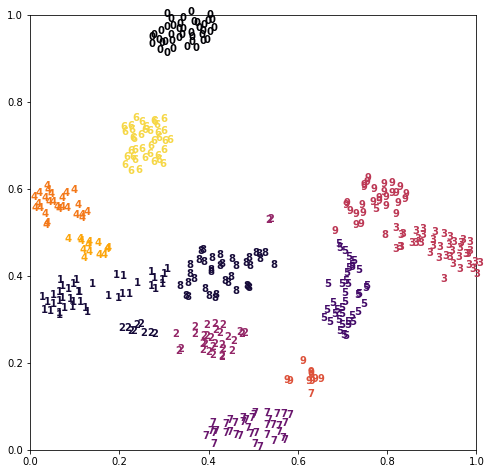

In [7]:
plt.figure(figsize=(8,8))

for i in range(X_red.shape[0]):
    plt.text(X_red[i,0], X_red[i,1], str(y[i]), color = plt.cm.inferno(labels[i]/10.), fontdict = {'weight': 'bold', 'size': 10})


plt.show()